In [1]:
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')

In [3]:
df.head()
# testdf.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#return one one observation from each label
unique_data=df.groupby('label').first()
unique_data.reset_index(inplace=True)
# unique_data

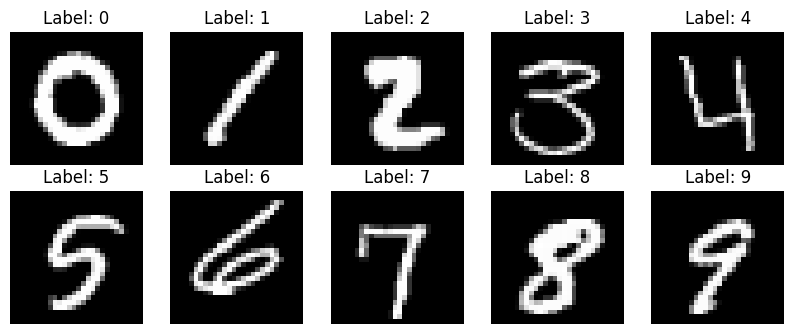

In [6]:
#plotting the unique data
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(unique_data.iloc[i,1:].values.reshape(28,28),cmap='gray')
    plt.title('Label: {}'.format(unique_data.iloc[i,0]))
    plt.axis('off')

In [7]:
y=df.label
X=df.iloc[:,1:]

def threshold(x):
    if x > 60:
        return 1
    else:
        return 0
    
X=X.applymap(threshold)

In [8]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

In [10]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(x_train.values,y_train)
  return grid

def report(model):
  print(model.best_params_)
  print(model.best_score_)
  preds=model.predict(x_test.values)
  print(metrics.accuracy_score(y_test,preds))
  cm=metrics.confusion_matrix(y_test,preds)
  print(cm)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(y_test,preds))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'n_neighbors': 3}
0.9592559523809524
0.9644047619047619
[[819   0   1   0   0   2   4   0   1   0]
 [  0 931   1   1   1   0   0   2   0   1]
 [ 11   6 797   5   0   0   1  10   5   0]
 [  2   2   6 825   1  10   3   5  10   6]
 [  2   5   0   0 774   0   3   0   0  30]
 [  5   4   0  15   0 721   7   0   3   4]
 [  7   2   1   0   0   4 812   0   1   0]
 [  0   9   3   0   4   0   0 848   0  16]
 [  3  18   2  12   2   7   1   2 760   6]
 [  2   0   1   3  11   0   0   7   0 814]]


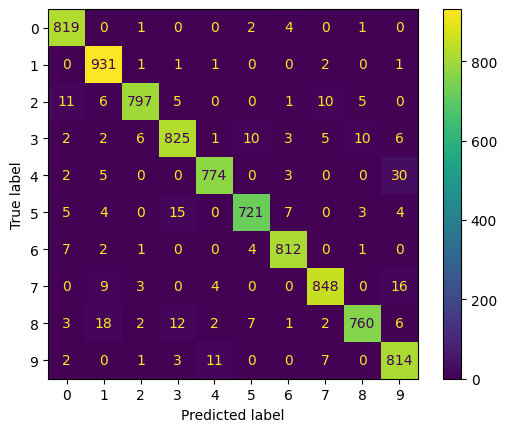

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       827
           1       0.95      0.99      0.97       937
           2       0.98      0.95      0.97       835
           3       0.96      0.95      0.95       870
           4       0.98      0.95      0.96       814
           5       0.97      0.95      0.96       759
           6       0.98      0.98      0.98       827
           7       0.97      0.96      0.97       880
           8       0.97      0.93      0.95       813
           9       0.93      0.97      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=train_model(KNeighborsClassifier(n_neighbors=3),{})
report(knn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}
0.9015476190476192
0.9061904761904762
[[780   0   5   4   5  11   8   2  10   2]
 [  0 906   4   2   0   3   4   2  15   1]
 [  5   4 727  24  11   5  16  14  22   7]
 [  0   4  25 764   3  30   0   9  26   9]
 [  2   6   5   1 745   5   9   2   7  32]
 [  7   2   8  37   8 650  11   2  24  10]
 [  5   1  12   1   8  15 778   2   4   1]
 [  5   5  15   3  12   0   0 803   3  34]
 [  4  14  11  25   7  19   6   2 712  13]
 [  6   4   3  12  24   2   0  37   3 747]]


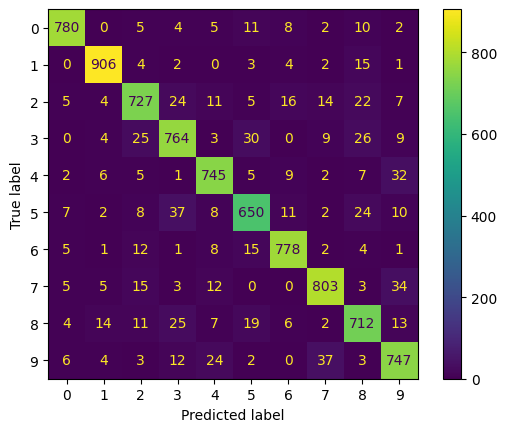

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       827
           1       0.96      0.97      0.96       937
           2       0.89      0.87      0.88       835
           3       0.88      0.88      0.88       870
           4       0.91      0.92      0.91       814
           5       0.88      0.86      0.87       759
           6       0.94      0.94      0.94       827
           7       0.92      0.91      0.92       880
           8       0.86      0.88      0.87       813
           9       0.87      0.89      0.88       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



In [10]:
from sklearn.linear_model import LogisticRegression

LR=train_model(LogisticRegression(penalty='l2',solver='saga',max_iter=1000),{})
report(LR)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'C': 1}
0.9681845238095238
0.9710714285714286
[[816   0   1   0   2   2   1   0   4   1]
 [  0 925   2   0   4   0   1   2   2   1]
 [  4   2 808   5   1   1   2   3   8   1]
 [  0   1   9 829   0  14   1   4   8   4]
 [  1   2   2   0 796   0   4   0   0   9]
 [  4   0   0  13   2 732   2   0   4   2]
 [  6   1   1   0   0   4 813   0   2   0]
 [  1   4   6   0   7   0   1 850   2   9]
 [  3   4   0   7   3   5   4   1 784   2]
 [  1   2   1   4  10   1   0  13   2 804]]


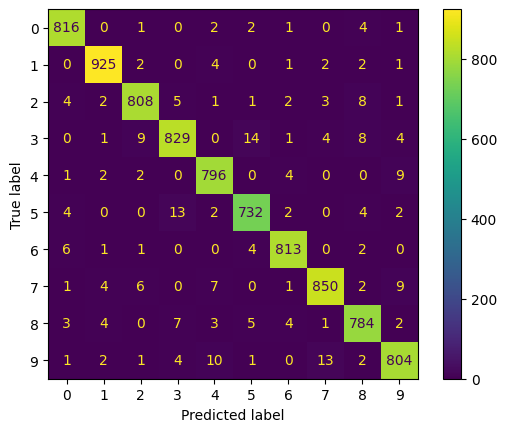

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       827
           1       0.98      0.99      0.99       937
           2       0.97      0.97      0.97       835
           3       0.97      0.95      0.96       870
           4       0.96      0.98      0.97       814
           5       0.96      0.96      0.96       759
           6       0.98      0.98      0.98       827
           7       0.97      0.97      0.97       880
           8       0.96      0.96      0.96       813
           9       0.97      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [13]:
from sklearn.svm import SVC

SC= train_model(SVC(kernel='rbf',decision_function_shape='ovo',gamma='scale'),params={'C':[1]})
                                                                        #probability=True
report(SC)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 21}
0.8564285714285714
0.8602380952380952
[[757   3   9   4   5  11  12   2  13  11]
 [  0 888   3   9   4   6   6   5  12   4]
 [ 13  14 689  27  14   6  19  18  24  11]
 [  4  11  28 694   4  47   4  14  38  26]
 [  2   6   8   7 718   2  11   5  15  40]
 [ 13   7   6  41   7 602  28   7  24  24]
 [ 16   4  11   7  19  24 727   0  12   7]
 [  7   8  18   8  10   4   2 789   6  28]
 [ 12  17  20  29  18  27  18   8 642  22]
 [  4   5   6  10  29  19   3  23  19 720]]


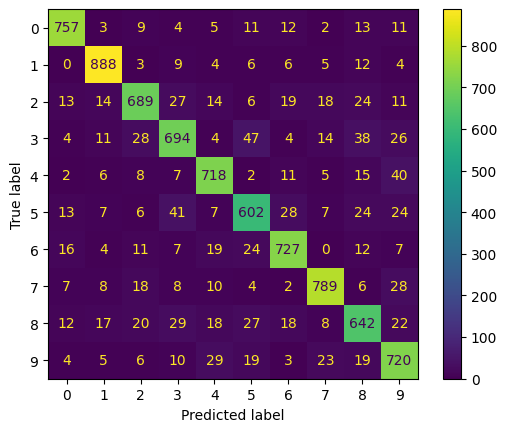

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       827
           1       0.92      0.95      0.93       937
           2       0.86      0.83      0.84       835
           3       0.83      0.80      0.81       870
           4       0.87      0.88      0.87       814
           5       0.80      0.79      0.80       759
           6       0.88      0.88      0.88       827
           7       0.91      0.90      0.90       880
           8       0.80      0.79      0.79       813
           9       0.81      0.86      0.83       838

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



In [11]:
from sklearn.tree import DecisionTreeClassifier

DT=train_model(DecisionTreeClassifier(random_state=42),params={'max_depth':list(range(5,30)) })
report(DT)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'learning_rate': 'adaptive'}
0.9629166666666666
0.9638095238095238
[[811   0   1   2   2   1   2   0   3   5]
 [  0 924   2   2   1   0   0   4   4   0]
 [  2   6 793   7   2   1   6   5  13   0]
 [  0   1   7 825   0  16   1   3   9   8]
 [  2   3   3   0 785   1   4   0   0  16]
 [  6   0   0  12   0 724   5   2   5   5]
 [  5   1   2   0   2   6 810   0   1   0]
 [  1   4   5   2   6   0   1 848   2  11]
 [  2   8   2   9   4   8   3   2 771   4]
 [  1   1   1   3  12   3   0  12   0 805]]


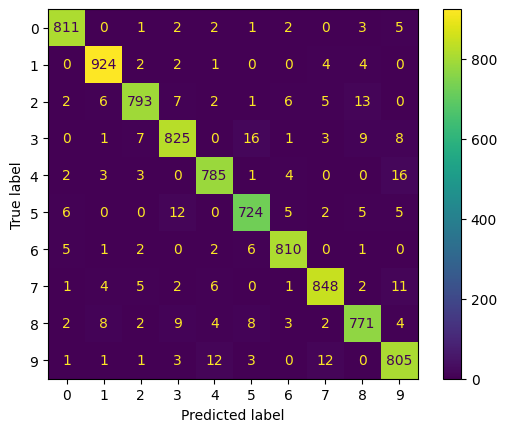

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.97      0.99      0.98       937
           2       0.97      0.95      0.96       835
           3       0.96      0.95      0.95       870
           4       0.96      0.96      0.96       814
           5       0.95      0.95      0.95       759
           6       0.97      0.98      0.98       827
           7       0.97      0.96      0.97       880
           8       0.95      0.95      0.95       813
           9       0.94      0.96      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [12]:
from sklearn.neural_network import MLPClassifier
mlp=train_model(MLPClassifier(activation='relu',solver='adam'),{'learning_rate':['constant','adaptive'],})
report(mlp)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}
0.9610714285714286
0.9635714285714285
[[812   0   1   0   2   2   4   0   6   0]
 [  0 923   1   0   3   3   1   4   1   1]
 [  7   2 789   8   4   2   5   8   9   1]
 [  1   0  14 818   0  14   2   6   9   6]
 [  2   1   3   0 790   0   5   0   1  12]
 [  4   1   0  12   2 725   5   0   4   6]
 [  6   2   1   0   1   5 808   0   4   0]
 [  2   2  11   1   7   0   0 847   0  10]
 [  1   3   2   7   7   6   3   0 779   5]
 [  2   1   1   9  10   3   0   8   1 803]]


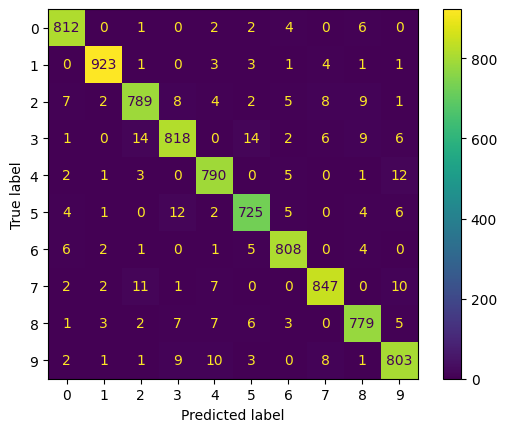

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       827
           1       0.99      0.99      0.99       937
           2       0.96      0.94      0.95       835
           3       0.96      0.94      0.95       870
           4       0.96      0.97      0.96       814
           5       0.95      0.96      0.95       759
           6       0.97      0.98      0.97       827
           7       0.97      0.96      0.97       880
           8       0.96      0.96      0.96       813
           9       0.95      0.96      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=train_model(RandomForestClassifier(n_estimators=100,random_state=42),{})
report(rf)

**Observation and Learning**

When comparing all models implemented above, support vector machine performed the best with accuracy score of 97.5% and decision tree performed the worst
with accuracy score of 85.5%.


*   Logistic regression was not suitable for this problem because in train data even small fluctuation can cause change in output and in logistic it generates a arbitrary line which does not provide accurate classification.
*   Decision tree was also not suitable for this problem because it will generate branches for small fluctutations in data which can cause overfitting.
*   KNN was suitable as it was able to classify based on clustered data which helped to avoid overfitting and therefore gave better accuracy
*   SVC was the most suitable model as it was able to provide the best classification line and in turn gave the best accuracy
*   MLP or multilayer perceptron was also suitable and can provide the best accuracy based on parameter tuning










**Conclusion**

In conclusion, building a handwritten digit recognition system using machine learning in Python involves selecting the appropriate dataset, preprocessing the data, choosing a suitable model, training the model, evaluating its performance, and developing a user interface for interactive use. These steps can be adapted and improved upon based on the specific requirements and constraints of the project.

In [13]:
import pickle as pkl

pkl.dump(SC,open('model/svc.pkl','wb'))
pkl.dump(LR,open('model/lr.pkl','wb'))
pkl.dump(DT,open('model/dt.pkl','wb'))
pkl.dump(knn,open('model/knn.pkl','wb'))
pkl.dump(mlp,open('model/mlp.pkl','wb'))
pkl.dump(rf,open('model/rf.pkl','wb'))
